In [1]:

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Hospital_data= pd.read_csv("C://Users//muhammad.saif//Documents//hospitaldata.csv")


In [2]:
for i in Hospital_data.columns:
    if ".." in i:
        Hospital_data.rename(columns={i: i.replace('..','_')}, inplace=True)
        
print(Hospital_data.head())


                       Date   id     Time Age Sex Consulting_Doctor  \
0  Sunday, January 01, 2017  101    11:00  40   F     Dr Kinza Alam   
1  Monday, January 02, 2017  150  10:45AM  26   M     Nursing Staff   
2  Monday, January 02, 2017   58  12:38PM  30   F  Dr Riffat Naheed   
3  Monday, January 02, 2017   75   1:00PM  40   M  Dr Riffat Naheed   
4  Monday, January 02, 2017   97   2:45PM  27   M  Dr Riffat Naheed   

         Specialty     Procedure Total_Charges  Amount_Received.  \
0            Gynae     C Section         30000           30000.0   
1              NaN      Dressing          1500            1500.0   
2  Psychotherapist  Consultation          1000            1000.0   
3  Psychotherapist  Consultation          1500            1500.0   
4  Psychotherapist  Consultation          2000            2000.0   

  Amount_Balance Amount.Received.By  Amount.in.Hospital Receptionist_Name  \
0           -           Mrs Shamsa                  NaN             Hamza   
1         

In [3]:
hospitaldate=Hospital_data['Date']
days=hospitaldate.map(lambda x: str(x).split(',')[0])
counts=days.value_counts()
print(counts)


Monday       51
Wednesday    43
Tuesday      42
Thursday     33
Friday       26
Saturday     20
Sunday        7
Name: Date, dtype: int64


In [4]:
Hospital_data['Age']=pd.to_numeric(Hospital_data['Age'],errors='coerce' )
Hospital_data['Age'].mean()


32.734375

In [5]:
no_of_children=Hospital_data[Hospital_data.Age<=12]
len(no_of_children.index)


23

In [6]:
str=Hospital_data.Sex
str.replace("f", "F")
Male=Hospital_data[Hospital_data.Sex=='M']
Female=Hospital_data[Hospital_data.Sex=='F']
print("Male:" ,Male['Procedure'].value_counts().index.tolist()[0])
print("Female:" ,Female['Procedure'].value_counts().index.tolist()[0])


Male: Consultation
Female: Consultation


In [7]:
Hospital_data['Total_Charges']=pd.to_numeric(Hospital_data['Total_Charges'],errors='coerce')
highest_earner = Hospital_data[['Consulting_Doctor', 'Total_Charges']].groupby(['Consulting_Doctor']).sum()
print(highest_earner)


                   Total_Charges
Consulting_Doctor               
Brig Asif                 2800.0
Brig Farrukh              3750.0
Col Ulfat Ellahi          1000.0
Dr Alaf Khan            513050.0
Dr Ali                   26100.0
Dr Ammad                  1400.0
Dr Ammara                 1500.0
Dr Fakiha                22600.0
Dr Irfan                 11000.0
Dr Kinza Alam            76700.0
Dr Mehwish                1000.0
Dr Mumtaz                 1000.0
Dr Paul                   1500.0
Dr Qurat ul Ain          20900.0
Dr Riffat Naheed         18800.0
Dr Saad                  52000.0
Dr Saad Riaz              5700.0
Dr Saima Shams            1500.0
Dr Saniya                 4000.0
Dr Shireen                3200.0
Dr Waqar Azeem            6000.0
Dr Zubair                 1700.0
Nursing Staff             9150.0


In [8]:
proc_type=Hospital_data[['Procedure', 'Total_Charges']].groupby(['Procedure']).sum()
print(proc_type)


                                Total_Charges
Procedure                                    
22 Unit Bridge                        69500.0
4 Unit Bridge                         11000.0
8 Unit Bridge+2 R.C.T                 30000.0
BSR                                      50.0
C Section                             65000.0
Cancelled                                 NaN
Consultation                          83950.0
Consultation +   X Ray                 3000.0
Consultation + Dressing                5000.0
Consultation + Nebulize                1150.0
Consultation + USG                     1500.0
Consultation+Denture                   1500.0
Consultation+ECG                       1300.0
Consultation+ER Retain                 2800.0
Consultation+Retain                    3500.0
Consultation+USG                       1500.0
Consultation+X Ray                     4750.0
Consultation+x Ray                      650.0
Coupety                                 300.0
Crown                             

In [9]:
Hospital_data.Time=pd.to_datetime(Hospital_data.Time, errors='coerce')
Hospital_data.Time.dt.hour.value_counts()


13.0    29
18.0    23
15.0    20
14.0    20
12.0    20
17.0    16
16.0    15
19.0    14
11.0    10
20.0     8
10.0     6
21.0     5
22.0     4
9.0      2
23.0     2
Name: Time, dtype: int64

In [10]:
def bracket_time(hour):
    if  hour>= 6.0 and hour<12.0:
        return "Morning"
    elif hour>= 12 and hour<14:
        return "Afternoon"
    elif  hour>=14 and hour<19 :
        return "Evening"
    elif  hour>=19 and hour<=23 or hour >= 0 and hour < 6 :
        return "Night"
    
Hospital_data['bracket_time']=Hospital_data.Time.dt.hour.apply(bracket_time)


In [11]:
patients_repeated=Hospital_data['id'].value_counts()
print(len(patients_repeated[patients_repeated>1].index))



37


In [12]:
print("Id \t Visits\n",patients_repeated)


Id 	 Visits
 1      12
46      5
122     5
140     4
94      4
17      4
45      3
101     3
63      3
132     3
114     3
109     3
107     3
145     3
20      2
97      2
59      2
88      2
96      2
112     2
116     2
118     2
25      2
80      2
120     2
40      2
100     2
64      2
4       2
133     2
       ..
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
154     1
79      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
89      1
90      1
91      1
92      1
93      1
95      1
98      1
99      1
102     1
103     1
78      1
Name: id, dtype: int64


In [13]:
x=Hospital_data[['id','Procedure']]
patient_visiting_again=x.groupby(['id','Procedure']).size()
print(patient_visiting_again[patient_visiting_again>1])


id   Procedure                     
1    Pharmacy                          10
12   22 Unit Bridge                     2
13   Consultation                       2
17   Consultation                       2
     RCT (4 teeth) Bridge (9 teeth)     2
20   Consultation                       2
25   Consultation                       2
45   R.P.D + Crown                      2
46   Dressing                           4
63   Consultation                       2
80   Consultation                       2
94   Injection                          3
97   Consultation                       2
101  C Section                          2
109  R.C.T                              2
112  Operation                          2
114  Consultation                       3
116  X Ray                              2
122  Injection                          5
130  Consultation                       2
140  4 Unit Bridge                      2
145  Crown                              3
151  R.C.T+Scalling+Crown               

In [14]:
female_median=Female.Age.median()
male_median=Male.Age.median()
print("Female Age Median: ", female_median)
print("Male Age Median: ", male_median)


Female Age Median:  30.0
Male Age Median:  29.0


In [15]:
consulting_charges=Hospital_data[Hospital_data.Procedure=='Consultation']
consulting_charges['Total_Charges'].sum()



83950.0

In [16]:
Cor=Hospital_data.corr()
Cor.loc[['Age'],['Total_Charges']]


,Total_Charges
Age,0.02809


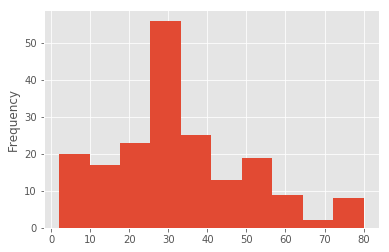

In [17]:
Hospital_data['Age'].plot.hist()
plt.show()


In [18]:
Hospital_data[(Hospital_data.Procedure== 'X Rays') | (Hospital_data.Procedure == 'Scalling')]['Total_Charges'].sum()



16500.0